# Reinforcement Learning

# 2. Dynamic programming

This notebook presents policy iteration and value iteration for finding the optimal policy.

Note that these techniques require the enumeration of all states and thus apply to a few models only (e.g., walk, maze, Tic-Tac-Toe, Nim).

In [1]:
import numpy as np

In [2]:
from model import Walk, Maze, TicTacToe, Nim
from agent import Agent

## Walk

In [3]:
walk = Walk()

In [4]:
states = walk.get_all_states()

In [5]:
len(states)

25

## Maze

In [6]:
maze_map = np.load('maze.npy')

In [7]:
maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

In [8]:
states = maze.get_all_states()

In [9]:
len(states)

105

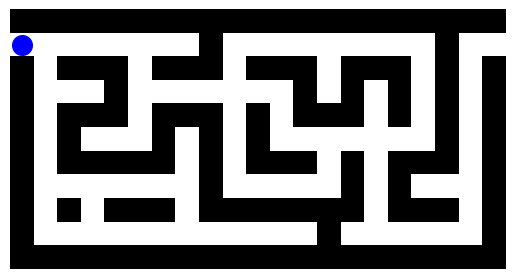

In [10]:
maze.display()

## Policy Iteration

In policy iteration, you start from an arbitrary policy and improve it sequentially from its value function. The limiting policy is optimal.

In [3]:
from dynamic import PolicyEvaluation, PolicyIteration

In [8]:
# let's start with the random policy
agent = Agent(maze)
policy = agent.policy

In [9]:
# policy evaluation
algo = PolicyEvaluation(maze, policy)
algo.evaluate_policy()
values = algo.values

In [10]:
len(values)

105

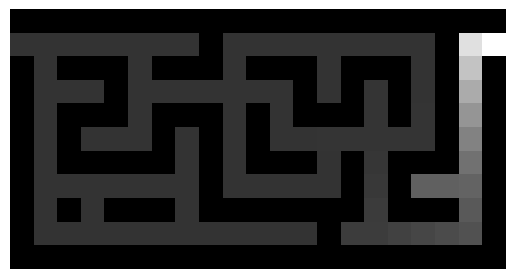

In [15]:
maze.display_values(values)

In [16]:
# policy improvement
new_policy = algo.get_policy()

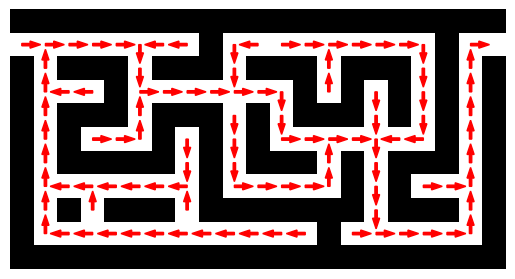

In [17]:
maze.display_policy(new_policy)

In [18]:
# let's test this new policy
agent = Agent(maze, new_policy)
stop, states, rewards = agent.get_episode()

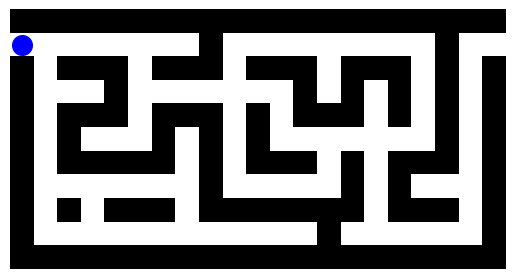

In [19]:
animation = maze.display(states)

In [20]:
animation

In general, several iterations of policy evaluation / policy improvement are necessary. 

In [21]:
algo = PolicyIteration(maze)

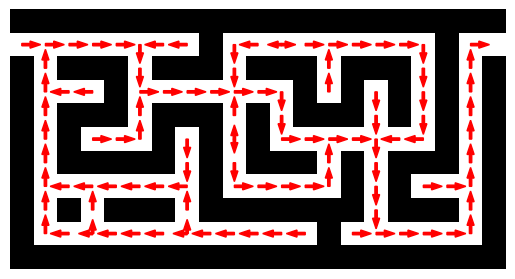

In [22]:
policy = algo.get_optimal_policy()
maze.display_policy(policy)

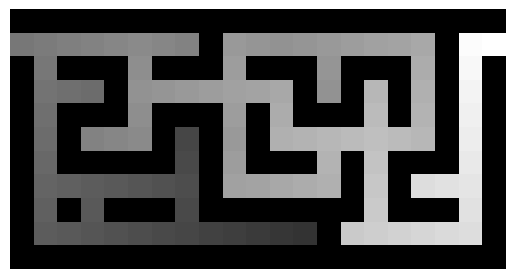

In [23]:
values = algo.values
maze.display_values(values)

## To do

Consider the Walk environment with a discount factor $\gamma = 0.9$.
* What is the expected gain of a random walk?
* Compare with the expected gain of the optimal policy, obtained by Policy Iteration.
* Display the optimal value function and the optimal policy. Interpret the results.
* Increase the strength of the wind and observe the new results.

In [24]:
walk = Walk()

In [25]:
# random policy
agent = Agent(walk)

In [26]:
gamma = 0.9

In [27]:
gains = agent.get_gains(gamma=gamma, n_runs=1000)

In [28]:
np.mean(gains)

1.1781178727084733

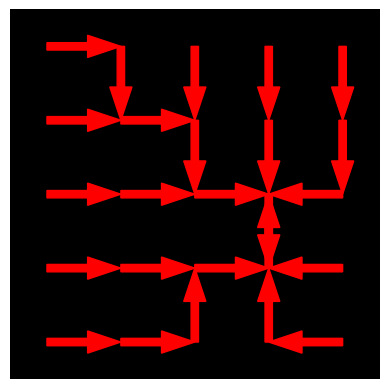

In [29]:
algo = PolicyIteration(walk, gamma=gamma)
policy = algo.get_optimal_policy()
walk.display_policy(policy)

In [30]:
agent_optimal = Agent(walk, policy)
gains_optimal = agent_optimal.get_gains(gamma=gamma, n_runs=1000)
np.mean(gains_optimal)

9.908412286873356

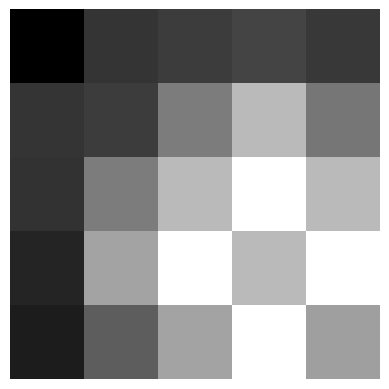

In [31]:
values = algo.values
walk.display_values(values)

In [ ]:
walk.Rewards

Interpretation: The power of the wind is weak so we can almost neglect it. The four directions around grid $(3,3)$ is lighter than others, because in these four grids, we can move to grid $(3,3)$ using only one step, thus gaining a reward of $3$.

In [ ]:
# previous wind 
wind = walk.Wind
wind

In [ ]:
# new wind
wind_ = {(0, 1): 0.8, (1, 0): 0.1}

In [ ]:
Walk.set_parameters(Walk.Size, Walk.Rewards, wind_)

In [ ]:
walk = Walk()
algo = PolicyIteration(walk, gamma=gamma)
policy = algo.get_optimal_policy()
walk.display_policy(policy)

In [ ]:
agent_optimal = Agent(walk, policy)
gains_optimal = agent_optimal.get_gains(gamma=gamma, n_runs=1000)
np.mean(gains_optimal)

In [ ]:
values = algo.values
walk.display_values(values)

Interpretation: It is obvious that the colors of grids $(2,2), (3,1), (3,3), (4,2)$ is lighter than others. Due to the wind, for example if we are at $(3,3)$ we can move one step left, then we have a great possibility that we are influenced by the wind and move one step right to reach $(3,3)$ again, thus obtain $3$ for reward.

## Value Iteration

Value iteration relies on Bellman's optimality equation. 

## To do

Check the code of ``ValueIteration`` below.
* Complete the method ``get_optimal_policy``.
* Test it on the maze and the walk.
* You play TicTacToe at random against an adversary using the one-step policy. What is your expected gain? 
* Observe the improvement when you play perfectly against the same adversary.
* Do the same with Nim.

In [11]:
class ValueIteration(PolicyEvaluation):
    """Value iteration. 
    
    Parameters
    ----------
    model: object of class Environment
        The model.
    player: int
        Player for games (1 or -1, default = default player of the game).        
    gamma: float
        Discount factor (between 0 and 1).
    n_iter: int
        Maximum number of value iterations.
    """
    
    def __init__(self, model, player=None, gamma=1, n_iter=100):
        agent = Agent(model, player=player)
        policy = agent.policy
        player = agent.player
        super(ValueIteration, self).__init__(model, policy, player, gamma)  
        self.n_iter = n_iter
        
    def get_optimal_policy(self):
        """Get the optimal policy by iteration of Bellman's optimality equation."""
        transitions = self.transitions
        # Bellman's optimality equation
        values = np.zeros(self.n_states)
        for t in range(self.n_iter):
            next_values = self.rewards + self.gamma * values
            action_value = {action: transition.dot(next_values) for action, transition in self.transitions.items()}
            values = np.zeros(self.n_states)
            for i, state in enumerate(self.states):
                if not self.model.is_terminal(state):
                    actions = self.get_actions(state)
                    # update values
                    values[i] = max([action_value[action][i] for action in actions])
        self.values = values
        policy = self.get_policy()
        return policy


In [ ]:
algo = ValueIteration(maze)

In [ ]:
policy = algo.get_optimal_policy()
maze.display_policy(policy)

In [ ]:
values = algo.values
maze.display_values(values)

In [ ]:
algo = ValueIteration(walk, gamma=gamma)
policy = algo.get_optimal_policy()
walk.display_policy(policy)

In [ ]:
game = TicTacToe(adversary_policy='one_step')
agent_random = Agent(game)
stop, states, rewards = agent_random.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent_random.get_gains(n_runs=1000)
np.mean(gains)

From the expectation of the gain we can interpret that we have a great chance to lose.

In [ ]:
algo = ValueIteration(game)
policy = algo.get_optimal_policy()

In [ ]:
agent_optimal = Agent(game, policy)
stop, states, rewards = agent_optimal.get_episode()

In [ ]:
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent_optimal.get_gains(n_runs=1000)
np.mean(gains)

We can observe that the expectation of gain is almost $1$ when we use optimal strategy.

In [ ]:
game = Nim(adversary_policy='one_step')
agent_random = Agent(game)
state = game.state
stop, states, rewards = agent_random.get_episode()
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent_random.get_gains(n_runs=1000)
np.mean(gains)

It seems that both sides are evenly matched and there's a slightly greater chance that we lose.

In [ ]:
algo = ValueIteration(game)
policy = algo.get_optimal_policy()

In [ ]:
agent_optimal = Agent(game, policy)
stop, states, rewards = agent_optimal.get_episode()
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent_optimal.get_gains(n_runs=1000)
np.mean(gains)

We are bound to win by using the optimal strategy.

## Perfect players

We now use Value Iteration to get perfect players, assuming the best response of the adversary.

## To do

Check the code of the new class ``ValueIteration`` below.
* Complete the method ``get_perfect_players``.
* Test it on TicTacToe. Who wins?
* Test it on Nim. Who wins?
* Is this approach applicable to ConnectFour? Why?

In [12]:
from scipy import sparse

In [13]:
class ValueIteration(PolicyEvaluation):
    """Value iteration. 
    
    Parameters
    ----------
    model: object of class Environment
        The model.
    player: int
        Player for games (1 or -1, default = default player of the game).        
    gamma: float
        Discount factor (between 0 and 1).
    n_iter: int
        Maximum number of value iterations.
    """
    
    def __init__(self, model, player=None, gamma=1, n_iter=100):
        agent = Agent(model, player=player)
        policy = agent.policy
        player = agent.player
        super(ValueIteration, self).__init__(model, policy, player, gamma)  
        self.n_iter = n_iter
    
    def get_perfect_players(self):
        """Get perfect players for games, with the best response of the adversary."""
        if not self.model.is_game():
            raise ValueError("This method applies to games only.")
        # get transitions for each player
        actions = self.model.get_all_actions()
        transitions = {action: sparse.lil_matrix((self.n_states, self.n_states)) for action in actions}
        for i, state in enumerate(self.states):    
            actions = self.model.get_available_actions(state)
            for action in actions:
                next_state = self.model.get_next_state(state, action)
                j = self.get_state_id(next_state)
                transitions[action][i, j] = 1
        transitions = {action: sparse.csr_matrix(transition) for action, transition in transitions.items()}
        self.transitions = transitions
        # Bellman's optimality equation
        values = np.zeros(self.n_states)
        # to be completed
        for t in range(self.n_iter):
            next_values = self.rewards + self.gamma * values
            action_value = {action: transition.dot(next_values) for action, transition in self.transitions.items()}
            values = np.zeros(self.n_states)
            for i, state in enumerate(self.states):
                if not self.model.is_terminal(state):
                    player, _ = state
                    actions = self.model.get_available_actions(state)
                    # update values
                    if player == 1:
                        values[i] = max([action_value[action][i] for action in actions])
                    else:
                        values[i] = min([action_value[action][i] for action in actions])
        self.values = values
        # policies
        policy = self.get_policy(self.player)
        adversary_policy = self.get_policy(-self.player)
        return policy, adversary_policy
        

In [14]:
Game = TicTacToe

In [15]:
game = Game()

In [16]:
algo = ValueIteration(game, player=1)

In [17]:
policy, adversary_policy = algo.get_perfect_players()

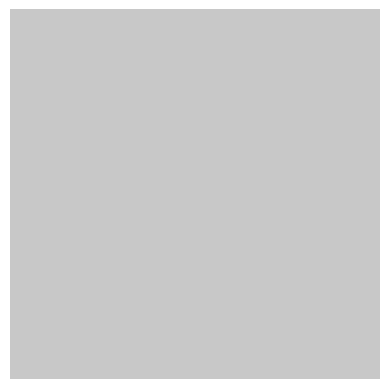

In [20]:
game = Game(adversary_policy='one_step')
agent = Agent(game, policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)

In [25]:
gains = agent.get_gains(n_runs=100000)
np.mean(gains)

0.7759

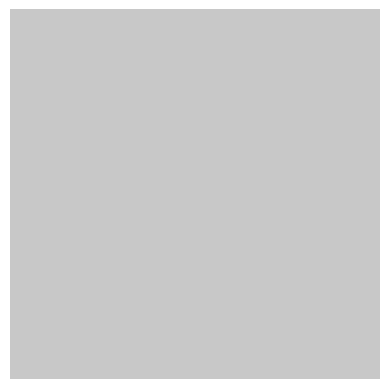

In [18]:
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)

In [ ]:
animation

In [19]:
gains = agent.get_gains(n_runs=1000)
np.mean(gains)

0.0

Nobody wins. We always get tie when playing TicTacToe, which is consistent with the reality.

In [ ]:
Game = Nim

In [ ]:
game = Game()

In [ ]:
algo = ValueIteration(game, player=1)

In [ ]:
policy, adversary_policy = algo.get_perfect_players()

In [ ]:
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent.get_gains(n_runs=1000)
np.mean(gains)

The first player always loses, because when using the optimal strategy to play Nim, the winner only depends on the initial state. And in this setting, $1\oplus 3\oplus 5\oplus 7=0$ and there's at least $1$ pile containing more than $1$.

In [ ]:
game = Game()
game.set_parameters([1, 3, 5, 8])
algo = ValueIteration(game, player=1)
policy, adversary_policy = algo.get_perfect_players()
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)

In [ ]:
animation

In [ ]:
gains = agent.get_gains(n_runs=1000)
np.mean(gains)

If we set the board to $[1,3,5,8]$, the first player always wins, because $1\oplus 3\oplus 5\oplus 8=1$ and there's at least $1$ pile containing more than $1$, and we can see from the animation that the first player always takes $1$.

In [ ]:
from model import ConnectFour
game = ConnectFour()
algo = ValueIteration(game, player=1)

It's not applicable to ConnectFour because the state space is too large.